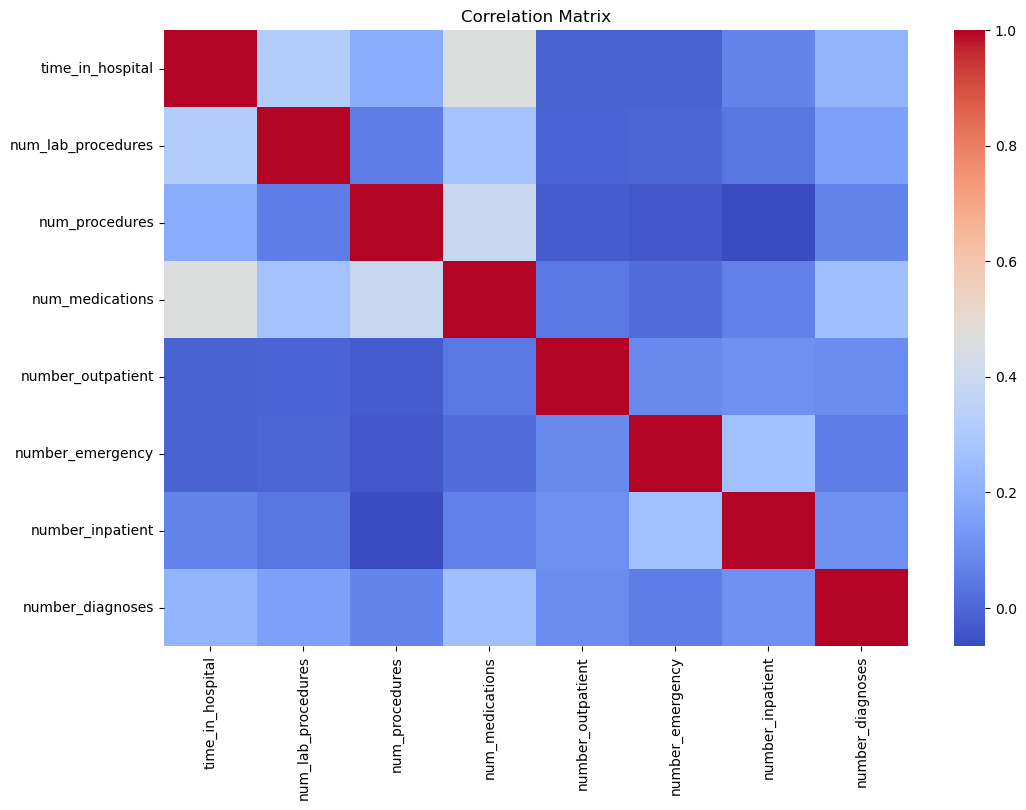

Number of features for 0.9999 explained variance: 12


In [1]:
%run preprocessing.py

In [2]:
from catboost import CatBoostClassifier

# we play with many different values for the most important hyperparameters
param_grid = {
    'iterations': [100, 500, 1000],
    'learning_rate': [0.001, 0.01, 0.1],
    'boosting_type': ['Ordered', 'Plain'],
    'bootstrap_type': ['Bayesian', 'MVS'],
}

# make an instance of the model
model = CatBoostClassifier(loss_function='Logloss',
                                    eval_metric='Logloss',
                                    random_strength=2.2e-06,
                                    bagging_temperature=5.65,
                                    od_wait=42,
                                    l2_leaf_reg=2e-03,
                                    od_type='IncToDec',
                                    verbose=False)

# the basic syntax for performing a grid search with the previously defined grid parameters
# and the custom scoring function, with 3 folds in cross validation
grid_search = GridSearchCV(model, param_grid, scoring=scoring_metric, cv=3)
# we fit the model
grid_search.fit(X_train, y_train)
# a variable in which we store the best parameters found by the grid search
best_params = grid_search.best_params_
print(best_params)

{'boosting_type': 'Plain', 'bootstrap_type': 'MVS', 'iterations': 500, 'learning_rate': 0.1}


In [3]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
f1 = f1_score(y_test, y_pred, average='macro')
acc = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.64      0.73      0.68     10952
           1       0.62      0.52      0.57      9402

    accuracy                           0.63     20354
   macro avg       0.63      0.62      0.62     20354
weighted avg       0.63      0.63      0.63     20354



In [4]:
from sklearn.metrics import confusion_matrix

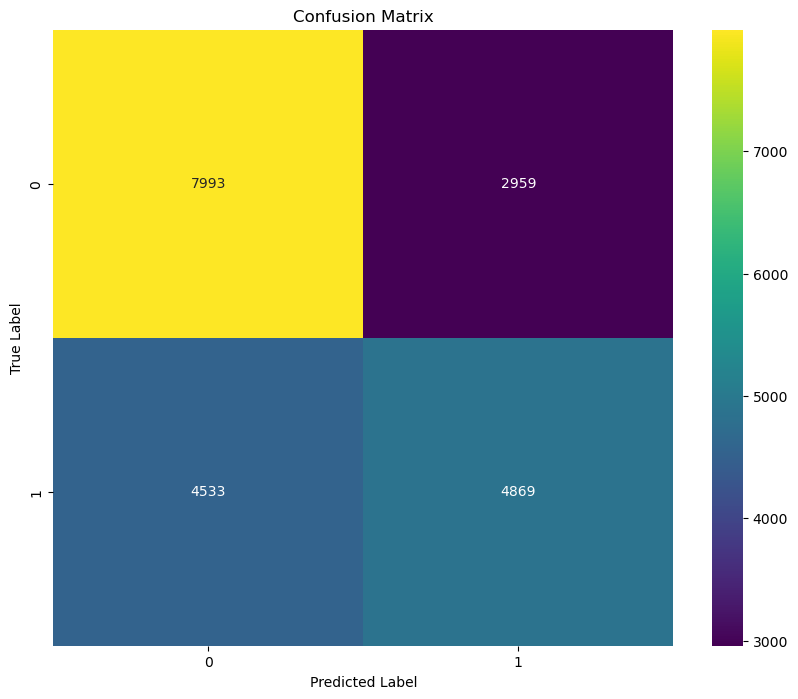

In [5]:
conf_matrix = confusion_matrix(y_test, y_pred)
# Plot confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='viridis', cbar=True)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [6]:
write_conclusions(model, f1, acc)